# Objective:


Build a	machine	learning	models	to	predict	house	prices using CRISP-DM Methods.	The	information	
contained	in	the	given	dataset	is	what	a	typical	home	buyer	would	want	to	know	before	making	a	purchase.	More	
speci ically,	with	79	explanatory	variables/features	describing	different	aspects	of	residential	homes	such	as	location,	
number	of	room,	neighborhood,	etc,	you	are	required	to	predict	the	inal	price	of	homes.


# Part	1:	Business	and	Data	Understanding

#### Load Libraries 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [4]:
# Load dataset 
df = pd.read_csv('House_Price.csv')

In [5]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
# 2.1 a) Summary Stats

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#Data entries

df.shape   # 1460 data entries 

(1460, 81)

In [8]:
#Data types 

print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [9]:
# number of categorical and numerical data 
print(df.dtypes.astype(str).value_counts())  

object     43
int64      35
float64     3
Name: count, dtype: int64


There are 43 categorical Data and 38 Numerical data


In [11]:
## Remove/Drop the ID as this feature is not helpful
#df.drop('Id', axis=1, inplace=True)

In [12]:
#2.1 b)

#Identify numerical features

numerical_feat = df.select_dtypes(include=['number'])
#print(numerical_feat)

In [13]:
corr_matrix = numerical_feat.corr() 
corr_matrix 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


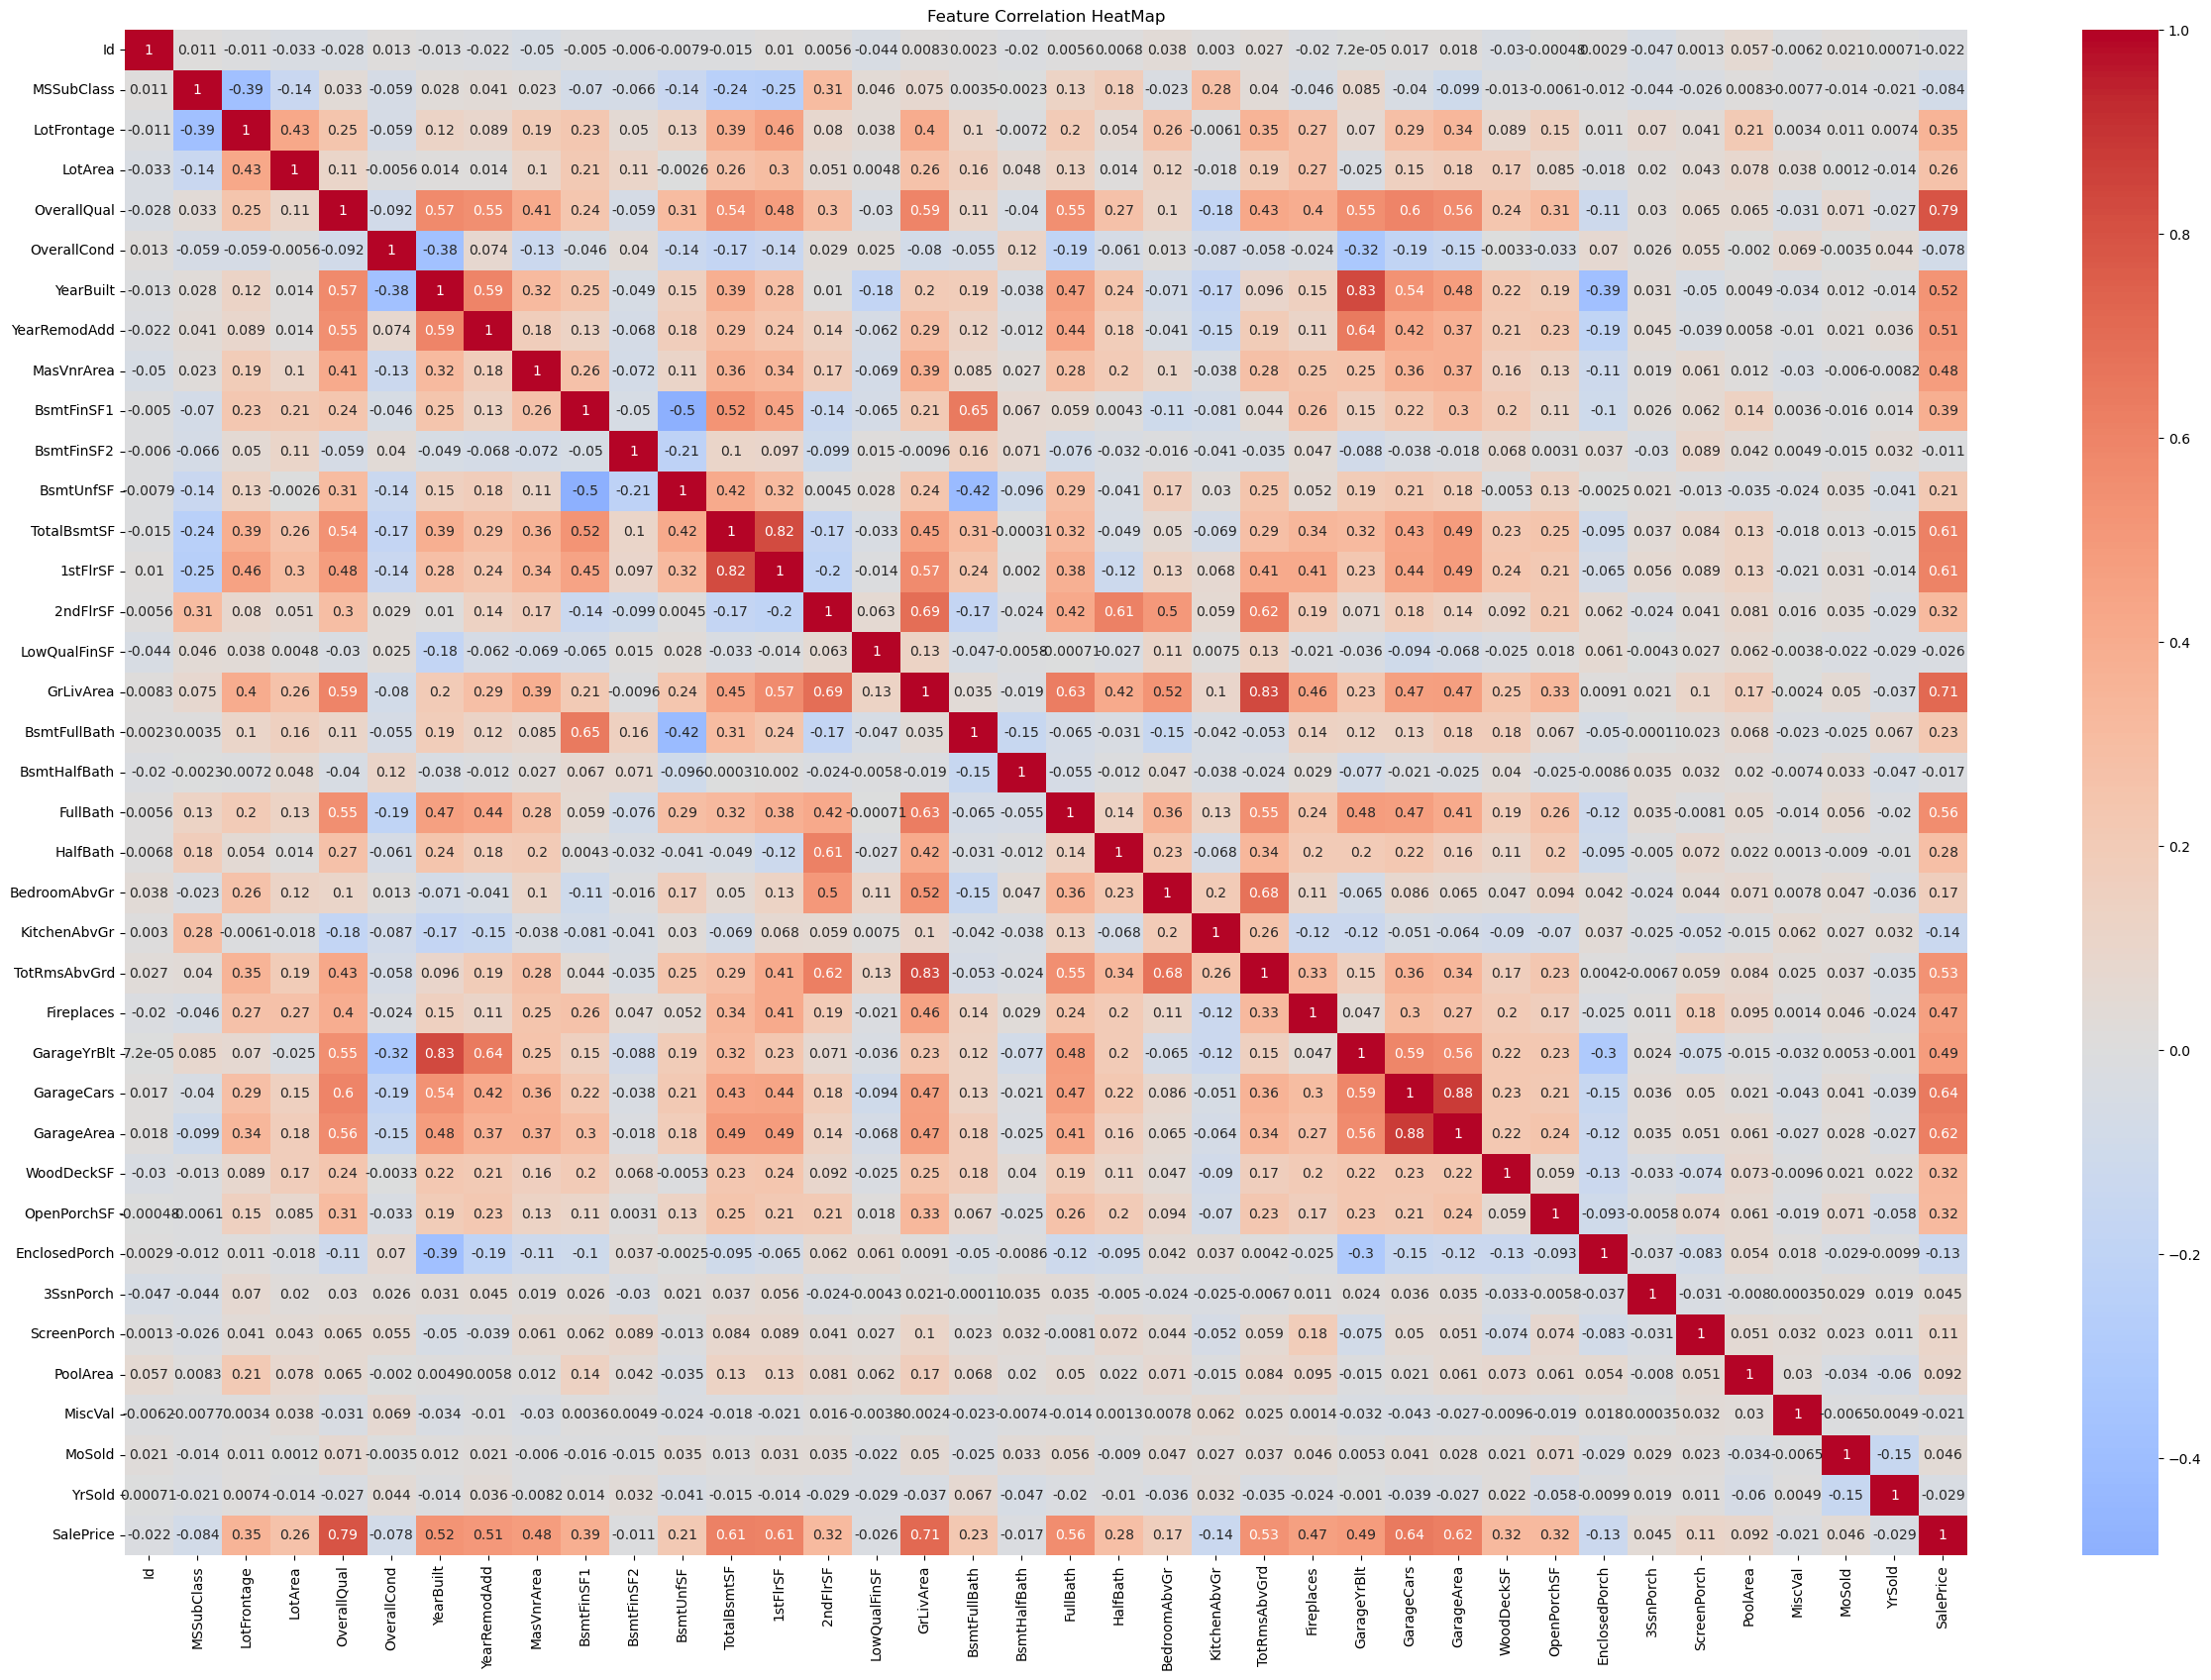

In [14]:
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix , annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation HeatMap')
plt.show()

In [15]:
corr_matrix = corr_matrix.abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

## find the features with correlation greater than the threshold
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

to_drop   #these features will introduce multicollinearity into the model and decrease model accuracy. They will be dropped.

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

In [16]:
# Dropo features, except sale price :

df.drop(columns =  ['Id','1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea'], inplace = True )

In [17]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

#to check correlation of features with sale price:
corr_saleprice = correlation_matrix['SalePrice'].drop('SalePrice')

####### For visualisation (convert cell from markdown to code):


plt.figure(figsize=(16, 10))
sns.barplot(x=corr_saleprice.index, y=corr_saleprice.values, palette='coolwarm')   #Reference Chat GPT 

plt.title('Correlation with SalePrice')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Numerical Features')
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linewidth=0.8)
plt.tight_layout()
plt.show()

In [19]:
#determine top 5 high correlations
top = corr_saleprice.sort_values(ascending=False).head()
top

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
TotalBsmtSF    0.613581
FullBath       0.560664
Name: SalePrice, dtype: float64

In [20]:
top5_plot = top.index.tolist() + ['SalePrice']  #Sale price also is to be plotted 
top5_plot                               

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'SalePrice']

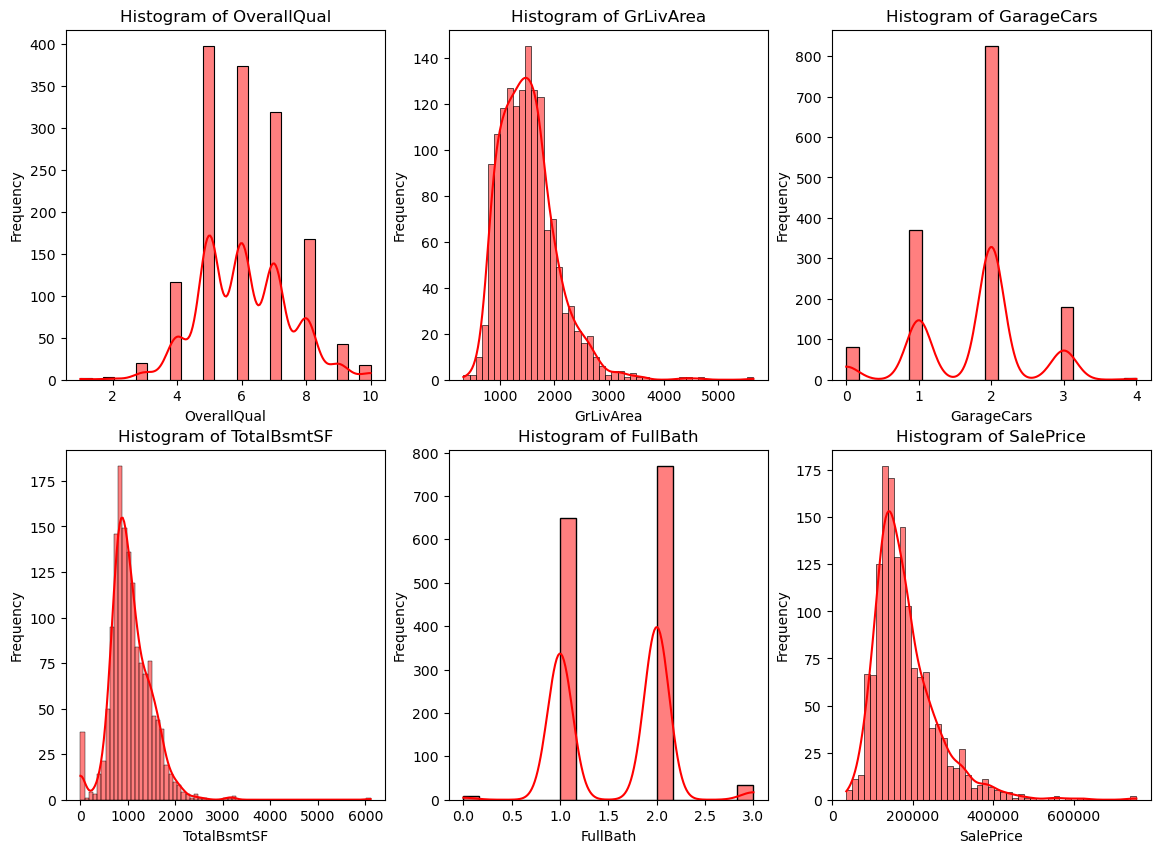

In [21]:
# 2.1 c) Histogram/ Distribution

plt.figure(figsize=(14, 10))
for i, feature in enumerate(top5_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature],  bins= 'auto', kde=True, color='red')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.show()

##### Determining the number of bins : 



Automativally determined through Sciikit Learn 

In [23]:
top_5 = df[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath',]]


In [24]:
### Skewness and kurtosis 

from scipy.stats import kurtosis

skewness = top_5.skew(numeric_only = True)

kurtosis = top_5.kurtosis(numeric_only = True)

print("Skewness of numerical features:")
print(skewness)

print("\nKurtosis of numerical features:")
print(kurtosis)



Skewness of numerical features:
OverallQual    0.216944
GrLivArea      1.366560
GarageCars    -0.342549
TotalBsmtSF    1.524255
FullBath       0.036562
dtype: float64

Kurtosis of numerical features:
OverallQual     0.096293
GrLivArea       4.895121
GarageCars      0.220998
TotalBsmtSF    13.250483
FullBath       -0.857043
dtype: float64


### Interpret skewness and kurtosis

FullBath and OverallQual features follow almost the same distribution as the normal distribution because their skewness is close to 0, while GarageCars has a slightly negative symmetrical (skewness) and has a near zero kurtosis, meaning it is normally distributed.
GrLivArea and TotalBsmtSF have highly positive skewness. The kurtosis of TotalBsmtSF is very high, implying that it has asharp peaked curve and a heavy tail meaning it is liely to have outliers.

It can be assumed that FullBath, OverallQual and GarageCars are normally distruibted , i.e we can use computations for normal distributions on these faeatures. TotalBsmtSF and GrLivArea are features that will need to be normalise before using them in a machine learning algorithm such as regressions. 

### Histogram and Distribution

<Axes: xlabel='TotalBsmtSF'>

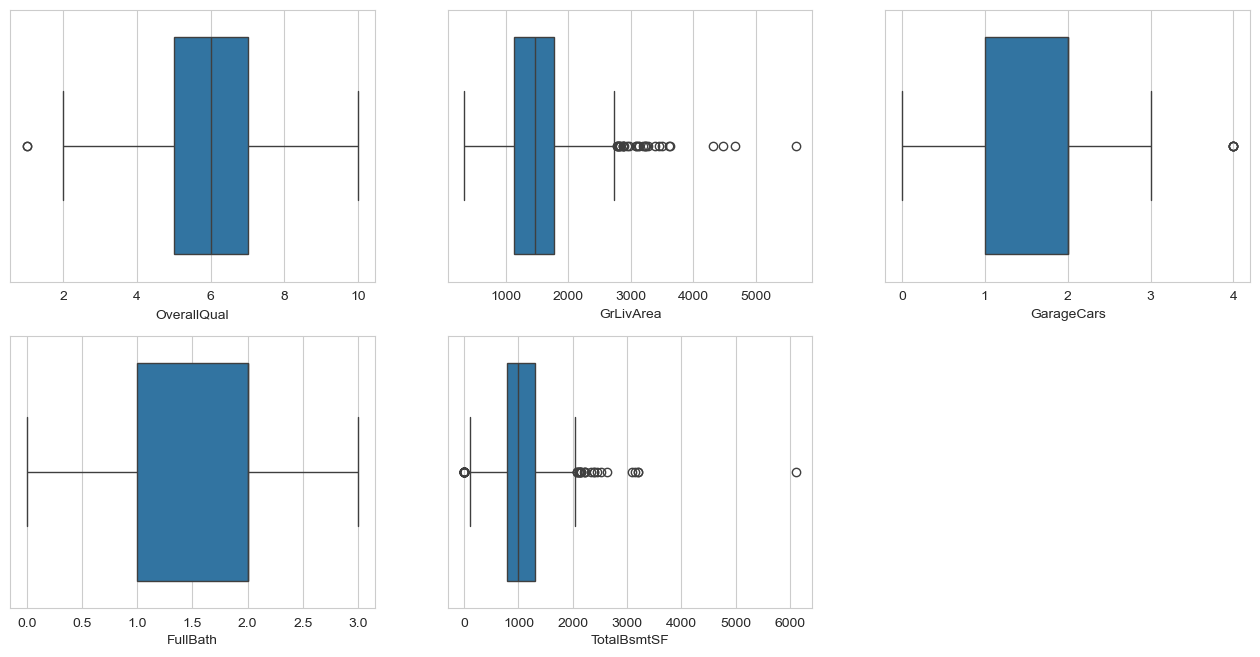

In [28]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')

plt.subplot(3,3,1)
sns.boxplot(x='OverallQual',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='GrLivArea',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='GarageCars',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='FullBath',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='TotalBsmtSF',data=df)

In [29]:
## Transform and normalise these 2 features using yeo-johnson method:

pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)
df[['GrLivArea', 'TotalBsmtSF']] = pt.fit_transform(df[['GrLivArea', 'TotalBsmtSF']])

### Assess for Missing Values 

In [31]:
missing = df.isnull().sum()

missing_df = missing [missing > 0]

In [32]:
percent_missing = (missing_df/ len(df))*100

In [33]:
missing_data = pd.DataFrame({'Missing Count': missing_df, 'Missing %': percent_missing})
missing_data

,Missing Count,Missing %
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,872,59.726027
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


##### *Missing Values* 

Missing values distort the true distribution of the data and therefore can introduce bias. They reduce the accuracy of a machine learning model by weakening the model's ability to learn patterns and make predictions. 

There are a total of 18 features that have missing data with some feaatures that have practically little to no data in the columns, such as PoolQC, MiscFeature	and Alley. These features will skew/distort the data and can be removed. Features with a low percentage of missing data can be imputed with the mean data (for numeric features) and the mode (for dicrete features). 

For this dataset, since thereare 79 features with very few features correlationg to the Sales Price of housing, features with over 40% missing data can be removed. 


In [35]:
# Remove features with missing data > 40% 

to_drop = missing_data[missing_data['Missing %'] > 40].index
to_drop

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [36]:
df = df.drop( columns = to_drop)

### 2.1.2 a) Data Mining Goals:

1. Determine which features most significantly affect house prices in the dataset.

2. Analyze how each feature influences the price by increasing the house price verses reducing house price. 

### 2.1.2 b) Machine Learning Paradigms:

1. I would select PCA as a dimensionality reduction method to eliminate the features that contribute less variation in determining the data mining goal. This will help me reduce the many features contributing to house prices to those that have the most informaition on the salesprice.

2. I would follow up with a regression model to determine the coeffecicents that most influence house pricing as well as determine the in which direction the prices are influenced. 

### 2.1.3 Hierarchical	Clustering	:

In [40]:
## extratct the top 5 features 
features =  top_5.values
X = features

In [41]:
# standardise the input features 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

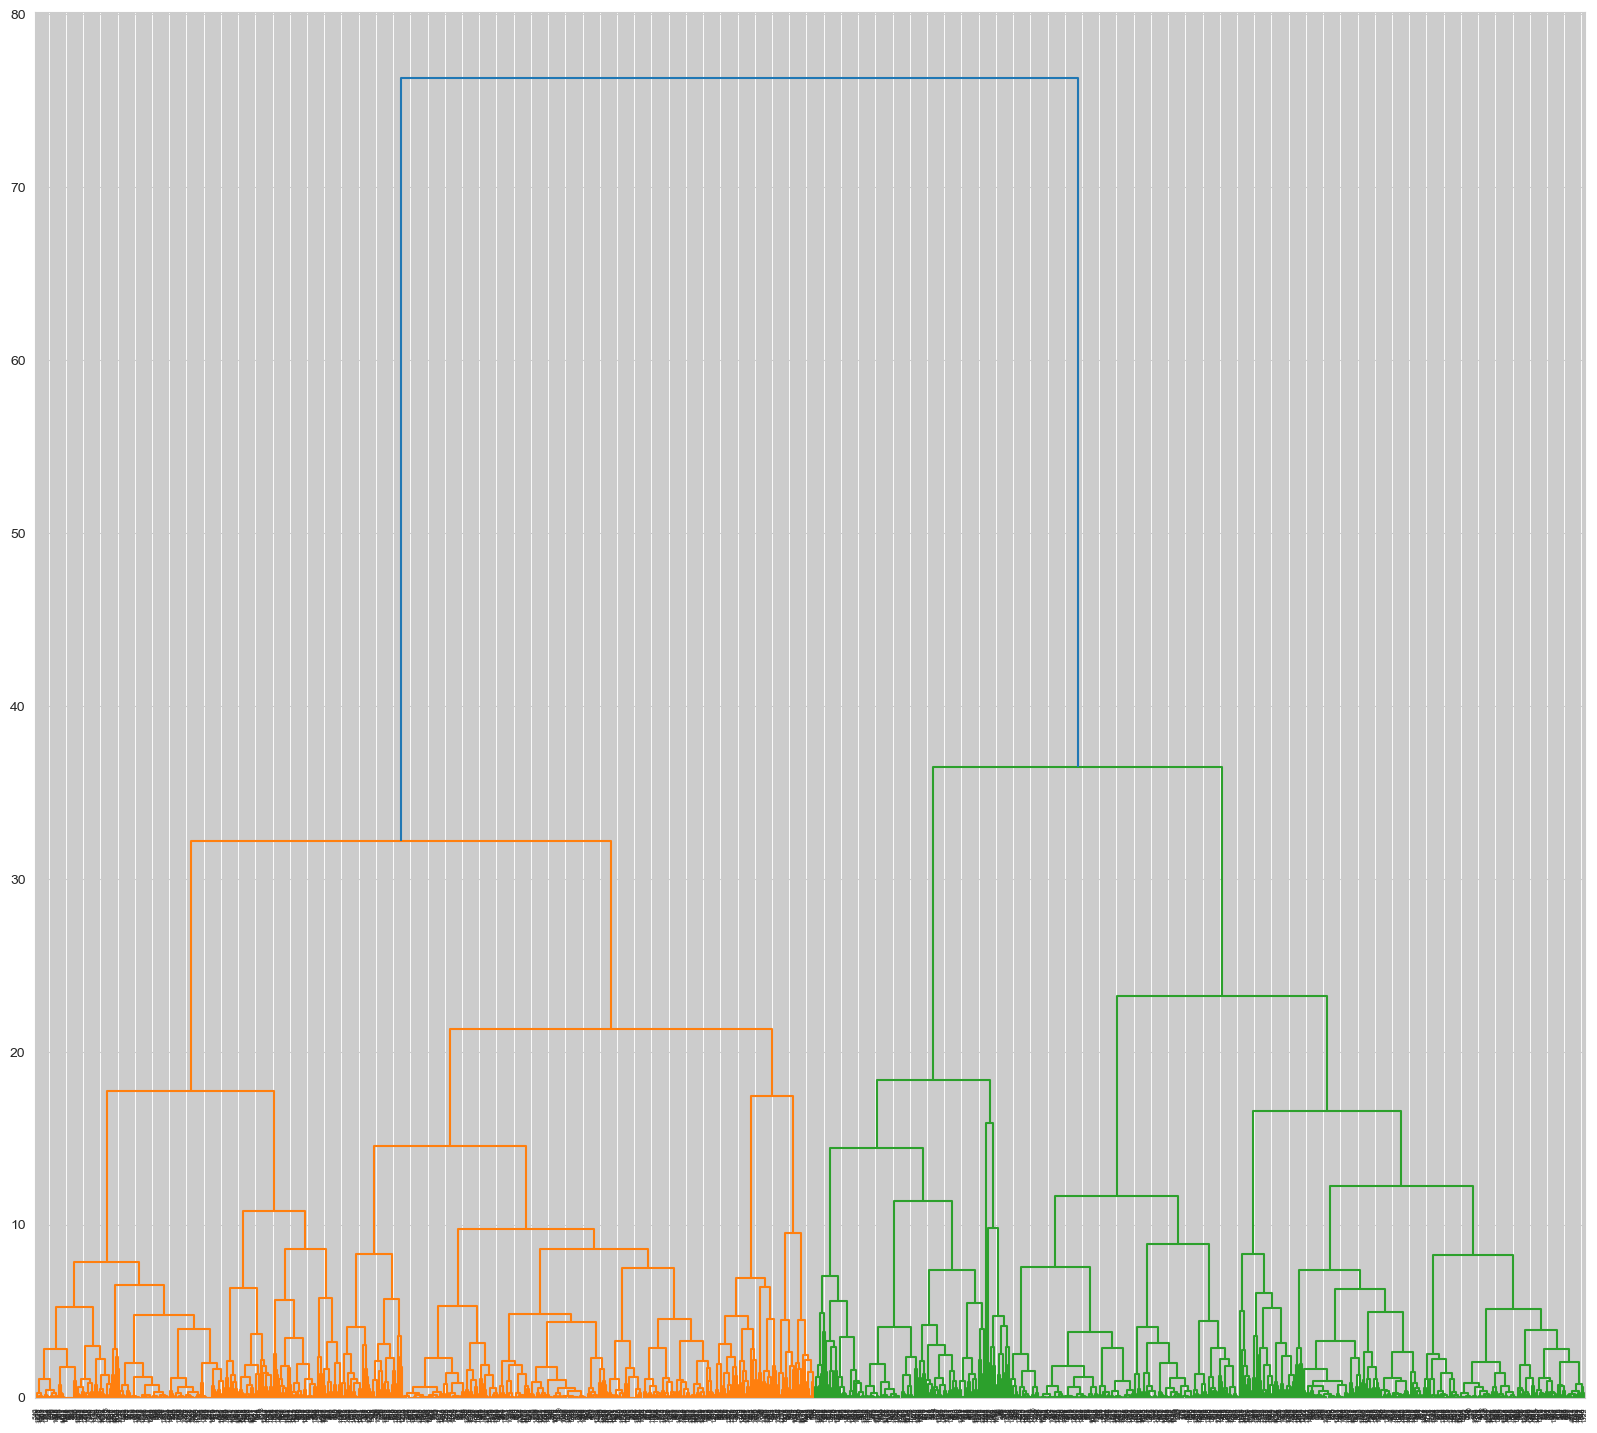

In [42]:
## Use the dendogram to help determine the optimal number of clusters before fitting the agglomerative clustering algorithm 

import scipy.cluster.hierarchy as sch

Z = sch.linkage(X_scaled, 'ward' )
plt.figure(figsize=(20,18))
dendogram = sch.dendrogram(Z)

Using a dissimilarity score of 40. A horizontal line from the threshold value intersects three branches of the dendogram. Therefore 2 will be used as the number of clusters for the model.

### Fit the model:

In [45]:
from sklearn.cluster import AgglomerativeClustering 

clustering = AgglomerativeClustering( n_clusters = 2).fit(X_scaled)  

In [46]:
labels = clustering.labels_
labels

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

### Visualize the clusters

In [48]:
colors = {0 : 'r',
          1 : 'g'} 

label_color = [colors[l] for l in labels]

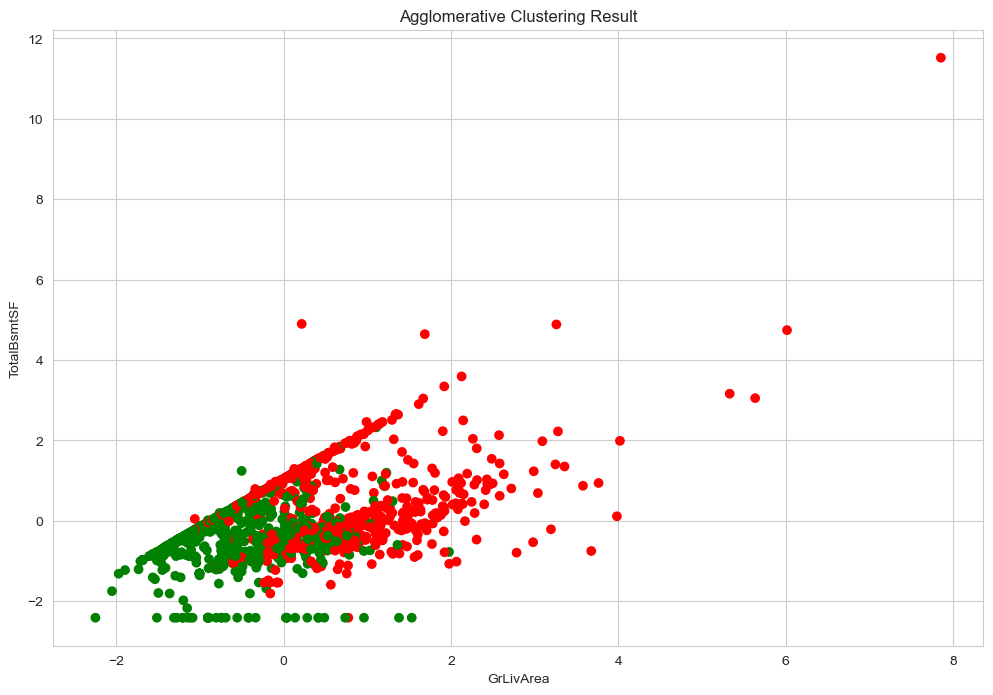

In [49]:
plt.figure(figsize=(12, 8))
plt.scatter(X_scaled[:, 1], X_scaled[:, 3], c=label_color)
plt.title('Agglomerative Clustering Result')
plt.xlabel('GrLivArea')
plt.ylabel('TotalBsmtSF')
plt.show()

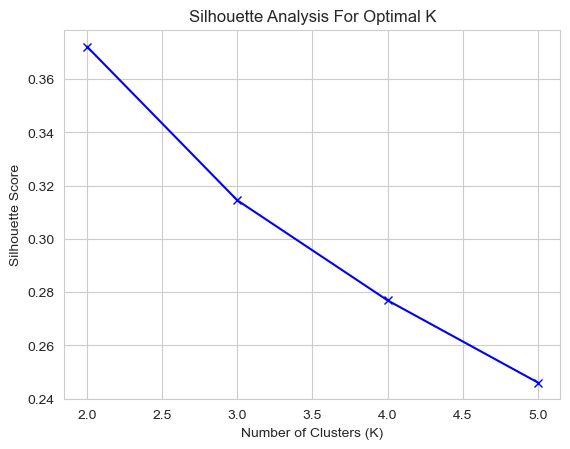

In [50]:
### Verify the ideal number of cluster with silhouette score
from sklearn.metrics import silhouette_score

n_clusters = range(2, 6)
silhouette_avg = []

for num_clusters in n_clusters:
    clustering = AgglomerativeClustering(n_clusters=num_clusters).fit(X_scaled)
    labels = clustering.labels_

    silhouette_avg.append(silhouette_score(X_scaled, labels))

plt.plot(n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal K')
plt.show()

#### Interpret the clusters

The clusters were visualised for the GrLivArea (above-ground living area) and TotalBsmtSF (total basement square feet) as axes. The red cluster appears is asociated with larger GrLivArea and TotalBsmtSF. This cluster likely represents houses with higher above-ground and basement areas which may indicate larger homes and possibly a higher-value home (Sale Price).
The green cluster has smaller GrLivArea and TotalBsmtSF values which might represent smaller or less expensive homes.

There is some overlap between the two clusters in the middle range of GrLivArea and TotalBsmtSF.  The overlap may mean that there is no distinct defining separation between larger homes and them having high sale price or vice versa. 


# Part 2: Data Preparation and Machine Learning

### Handling Missing Data:

In [55]:
#Impute missing data with the mean values of the overall feature:

from sklearn.impute import SimpleImputer

In [56]:
#impute on numerical columns only
num_cols = df.select_dtypes(include=['float64', 'int64']).columns 

#num_cols   #verify 

In [57]:
imp = SimpleImputer(strategy='mean')  
df[num_cols]= pd.DataFrame(imp.fit_transform(df[num_cols]), columns=num_cols, index=df.index)  # refernce chat

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0


In [58]:
## For Categporical data impute the missing values with the mode/ most common input of the feature

cat_cols = df.select_dtypes(include=['object']).columns

imp = SimpleImputer(strategy='most_frequent')
df[cat_cols] = pd.DataFrame(imp.fit_transform(df[cat_cols]), columns=cat_cols, index=df.index)

df.head() # Check

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0


### Determine if there Duplicates in Data

In [60]:
## Check for duplicates
duplicateR = df.duplicated()  #for rows
 
#print("Duplicate Rows:")
#print(df[duplicateR])

In [61]:
duplicateC = df.T.duplicated()  #for columns
#duplicate_col = df.T[duplicateC].T

#print(df[duplicateR])  

### Drop extremely low correlating data

In [63]:
#Drop those with correlation less than 0.05 (5%)
Filtered = corr_saleprice[abs(corr_saleprice) <= 0.05].index

Filtered

Index(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [64]:
df = df.drop(columns = Filtered)

In [65]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0.0,61.0,0.0,0.0,0.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298.0,0.0,0.0,0.0,0.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0.0,42.0,0.0,0.0,0.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0.0,35.0,272.0,0.0,0.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192.0,84.0,0.0,0.0,0.0,WD,Normal,250000.0


### Removing Outliers

 From the boxplots in the EDA done earlier some of the highly correlationg features to Sales Price had outliers. Remove Outliers in these highly 
correlated features only since they have the most influence on the sales price, in particluar:
- GrLivArea    
- GarageArea     
- TotalBsmtSF , have the most outliers 


In [68]:
# Use the z score method:
from scipy import stats


z_gla = np.abs(stats.zscore(df['GrLivArea']))
z_tb = np.abs(stats.zscore(df['TotalBsmtSF']))

In [113]:
threshold_z = 3

outlier_indices1 = np.where(z_gla > threshold_z)[0]
outlier_indices3 = np.where(z_tb > threshold_z)[0]


all_outlier = np.concatenate([outlier_indices1, outlier_indices3])

###Drop the rows with outliers
df2 = df.drop(all_outlier)

print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", df2.shape)

Original DataFrame Shape: (1460, 63)
DataFrame Shape after Removing Outliers: (1412, 63)


### Standardize 

In [115]:
# standardise the numerical features 
numerical_cols = df2.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

### Encode Categorical Data

- Separate the categorical data into 2 types: ordinal and nominal.
- For the Ordinal, define the order of the category for the encoder

In [77]:
from sklearn.preprocessing import OrdinalEncoder

In [117]:
cat_data = df2.select_dtypes(include=['object']).columns
cat_data 

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [119]:
ordinal_columns = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'LandContour': ['Low', 'HLS', 'Bnk', 'Lvl'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],   
    'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PavedDrive': ['N', 'P', 'Y'],
    'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
    'LandSlope': ['Sev', 'Mod', 'Gtl'],
    'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'Street': ['Grvl', 'Pave'],
    'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']
}

In [121]:
for col, order in ordinal_columns.items():             #encode
    df2[col] = pd.Categorical(df2[col], categories=order, ordered=True)       #Reference ChatGPT
    df2[col] = df2[col].cat.codes

In [123]:
nominal_col = [
    'MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'Foundation', 'Heating', 'CentralAir', 'Electrical',
    'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition', 'LotConfig'
]

In [125]:
## Use the one hot encoder 

df2 = pd.get_dummies(df2, columns=nominal_col, drop_first=True)  #drop one of the encoder to avoid multicollinearity

In [127]:
df2.tail() #check

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
1455,0.072043,-0.371122,-0.256351,1,0,3,3,2,-0.101280,-0.535861,...,True,False,False,False,True,False,False,False,False,True
1456,-0.873139,0.717584,0.269870,1,0,3,3,2,-0.101280,0.364896,...,True,False,False,False,True,False,False,False,False,True
1457,0.308339,-0.181782,-0.143761,1,0,3,3,2,0.651391,3.067165,...,True,False,False,False,True,False,False,False,False,True
1458,-0.873139,-0.087112,-0.076207,1,0,3,3,2,-0.853952,0.364896,...,True,False,False,False,True,False,False,False,False,True
1459,-0.873139,0.244233,-0.054189,1,0,3,3,2,-0.853952,0.364896,...,True,False,False,False,True,False,False,False,False,True


## Save as CSV file

In [129]:

df2.to_csv('cleaned_data.csv', index=False)

In [133]:
## Load Preprocessed dataset

df_clean = pd.read_csv('cleaned_data.csv')

In [137]:
#df_clean.head()  check

# Dimensionality Reduction 

## Principal Component ANalyis:

In [139]:
from sklearn.decomposition import PCA

X = df_clean.drop(columns='SalePrice')
y = df_clean['SalePrice']


In [151]:

pca = PCA(n_components=70)  #because of the many components use 70 as component so that the kink on the plot is easily seen
Xpca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

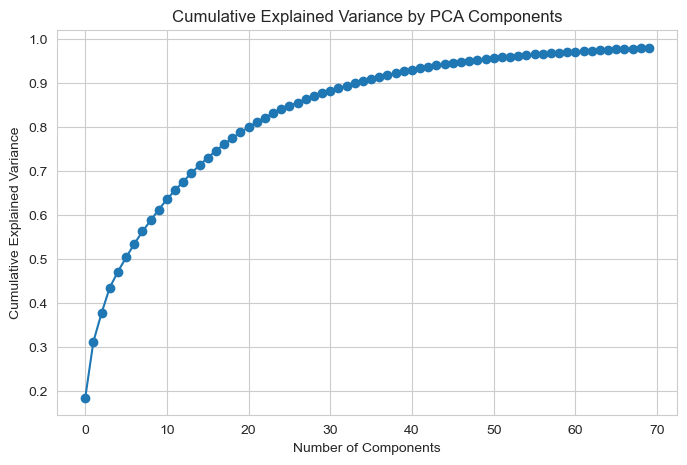

In [153]:
# visualise the  cumulative explained variance to determine the optimal number of components

#Cumulative sum of variance explained with [n] features
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 5))
plt.plot( cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()



From the plot we see that 30 components explain around 88% of the variance in the data.

## T-distributed Stochastic Neighbour Embedding (T-SNE)

In [155]:
from sklearn.manifold import TSNE

tsne = TSNE( )
X_tsne = tsne.fit_transform(X)


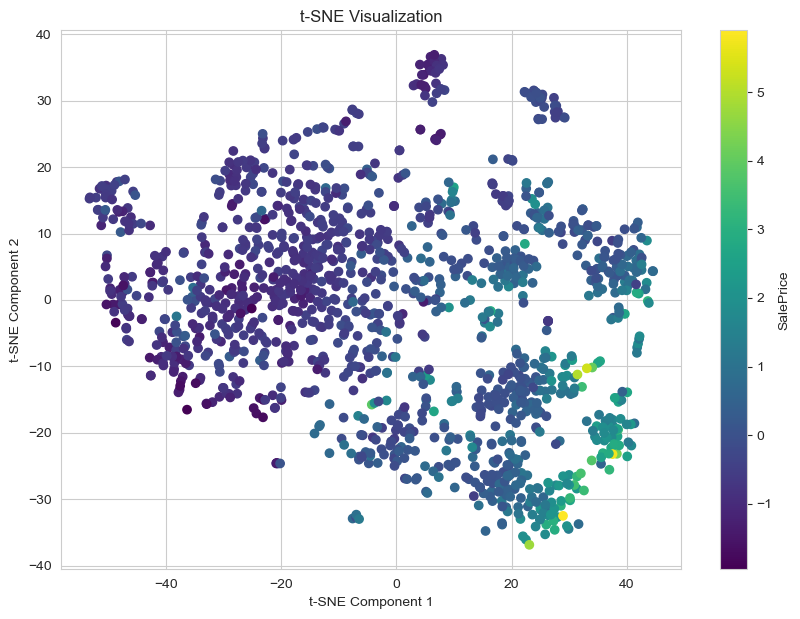

In [149]:
## Use 3 components

plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],  c=y, cmap='viridis')
plt.colorbar(label='SalePrice')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [159]:
# Get the loadings (coefficients) of the features on the principal components
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(70)], index=X.columns)  #Reference Chat GPT

print("PCA Loadings:")
print(loadings)

# Identify features with high absolute loadings
important_features = loadings[(loadings.abs() > 0.5).any(axis=1)]  
print("\nImportant Features based on PCA Loadings:")
print(important_features)

PCA Loadings:
                            PC1       PC2       PC3       PC4       PC5  \
MSSubClass            -0.002662  0.019142  0.273414 -0.312209  0.278719   
LotFrontage            0.095945  0.072067 -0.048580  0.365755 -0.070992   
LotArea                0.070870  0.017553  0.024751  0.361638 -0.092385   
Street                 0.000501  0.001257  0.000619 -0.004228  0.000246   
LotShape               0.056810  0.024583 -0.000615  0.068272 -0.075930   
...                         ...       ...       ...       ...       ...   
SaleCondition_Partial  0.028304  0.032768 -0.045944 -0.019197  0.009984   
LotConfig_CulDSac      0.012186  0.000661  0.000842  0.012618 -0.019478   
LotConfig_FR2          0.003691 -0.001009  0.000671 -0.008096  0.000608   
LotConfig_FR3          0.000727 -0.000078  0.000017 -0.001196  0.000483   
LotConfig_Inside      -0.008008 -0.008371 -0.006243 -0.040147  0.025302   

                            PC6       PC7       PC8       PC9      PC10  ...  \
MSSub

**Based on the PC Loadings, the following features are the key features that are relevant at predeicting sale price:**

- BsmtFinType1 
- ExterQual 
- GarageCars 
- Fireplaces 
- KitchenAbvGr 
- LotFrontage 
- LotArea 


Use these in the ML model..

From the Agglomerative clustering and visualizing the clusters (2 clusters), we can deduce that the two clusters describing the features that influence sale price are  __Interior Housing Features__ (Basement Finish Type 1; Kitchens Above Grade  Number of Fireplaces; Number of Cars in Garage) and __External Housing Features__ (Exterior Quality; Linear feet of street connected to property and Lot size in square feet).

# Machine Learning 

## Linear Regression	

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse 




In [172]:
features = ['BsmtFinType1', 'ExterQual', 'GarageCars', 'Fireplaces', 'KitchenAbvGr', 'LotFrontage', 'LotArea']

X = df_clean[features]
y = df_clean['SalePrice']



In [174]:
# split data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=309)

lg = LinearRegression()
lg.fit(X_train, y_train)

# Predict on the test set
y_pred = lg.predict(X_test)

In [176]:
# Get mean squared erro
mse_train = mse(y_train, lg.predict(X_train))
mse_test = mse(y_test, y_pred)

In [178]:
print("Linear Regression:")
print(f"Training MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}\n")

Linear Regression:
Training MSE: 0.29
Test MSE: 0.35



## Ridge Rregression	

In [180]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge_reg.predict(X_test)

In [182]:
# Mean squared error for ridge regression
mseR_train = mse(y_train, ridge_reg.predict(X_train))
mseR_test = mse(y_test, y_pred_ridge)

In [184]:
print("Ridge Regression (alpha=0.5):")
print(f"Training MSE: {mseR_train:.2f}")
print(f"Test MSE: {mseR_test:.2f}")

Ridge Regression (alpha=0.5):
Training MSE: 0.29
Test MSE: 0.35


### Observation

Both the Ridge regression and the linear regression produce the same mse for the training and the test data. Ridge regression is usuallya better model than linear regression as it uses regularization. But producing smae mse implies that the model did not improve from linear regression to ridge regression.. This may be because the fdaat was well processed and multicollineariy was dealt with as well as outlier and Dimensionality redcation (ie to remove possibility of overfitting) . The error in testing is higher than training which is expected.

# Part	3:	Further	Analyses	

## Decision Tree Regression

In [200]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state= 309)
tree_reg.fit(X_train, y_train)

y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

In [202]:
mseDT_train = mse(y_train, y_train_pred)
mseDT_test = mse(y_test, y_test_pred)

print(f"MSE on Training Set: {mseDT_train}")
print(f"MSE on Testing Set: {mseDT_test}")

MSE on Training Set: 0.0011807234695655389
MSE on Testing Set: 0.6181926568676742


The decision tree model achieved a very low MSE on the training data (0.001), however these low values may signify overfitting as indicated by a much higher test MSE (0.618). Decision trees are usually prone to overfitting and need to be pruned

## SVM Regression

In [190]:
from sklearn.svm import SVR

svm_reg = SVR()
svm_reg.fit(X_train, y_train)

y_pred_svm = svm_reg.predict(X_test)


In [194]:
# Calculate the Mean Squared Error for SVM Regression
mseS_train = mse(y_train, svm_reg.predict(X_train))
mseS_test = mse(y_test, y_pred_svm)

# Print the results
print("SVM Regression:")
print(f"Training MSE: {mseS_train:.2f}")
print(f"Test MSE: {mseS_test:.2f}")

SVM Regression:
Training MSE: 0.23
Test MSE: 0.32


# References

Dendogram: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Agglormerative Clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

Outliers: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

Skew Data Normalization: https://scikit-learn.org/stable/modules/preprocessing.html

Scikit Learn (various): https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

ChatGP: Referenced